In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Load Dataset
df = pd.read_csv('../data/raw/diabetes_012_health_indicators_BRFSS2023.csv')

In [24]:
# Check the shape and columns
print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

print("\nTarget Distribution:\n", df['Diabetes_012'].value_counts(normalize=True))

Shape of dataset: (261589, 23)
Columns: ['Diabetes_012', 'KidneyDisease', 'HighBP', 'HighChol', 'CholCheck', 'Asthma', 'COPD', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'AgeGroup', 'Education', 'Income']

Summary Statistics:
         Diabetes_012  KidneyDisease         HighBP       HighChol  \
count  261589.000000  261589.000000  261589.000000  261589.000000   
mean        0.317571       1.964016       0.430435       0.420843   
std         0.713537       0.337906       0.495138       0.493695   
min         0.000000       1.000000       0.000000       0.000000   
25%         0.000000       2.000000       0.000000       0.000000   
50%         0.000000       2.000000       0.000000       0.000000   
75%         0.000000       2.000000       1.000000       1.000000   
max         2.000000       9.000000       1.000000       1.000000   

           CholCheck

<Axes: xlabel='Diabetes_012', ylabel='count'>

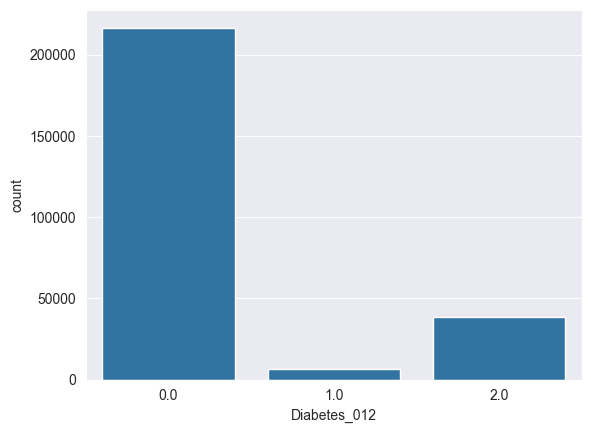

In [17]:
sns.countplot(x='Diabetes_012', data=df)

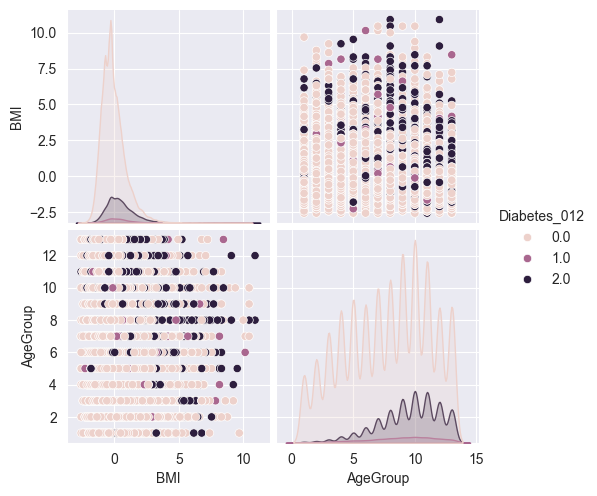

In [19]:
sns.pairplot(df[['BMI', 'AgeGroup', 'Diabetes_012']], hue='Diabetes_012')

<Axes: xlabel='Diabetes_012', ylabel='PhysHlth'>

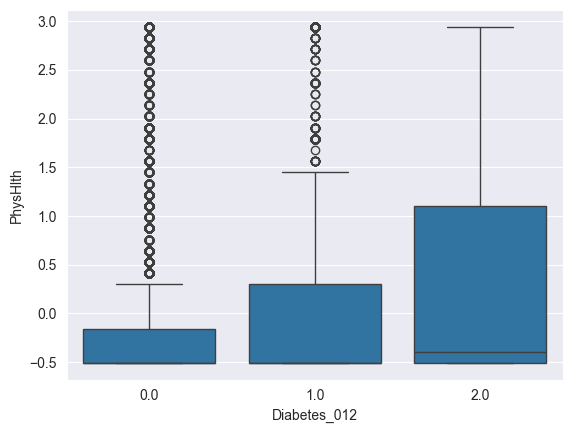

In [20]:
sns.boxplot(x='Diabetes_012', y='PhysHlth', data=df)

<Axes: xlabel='AgeGroup', ylabel='count'>

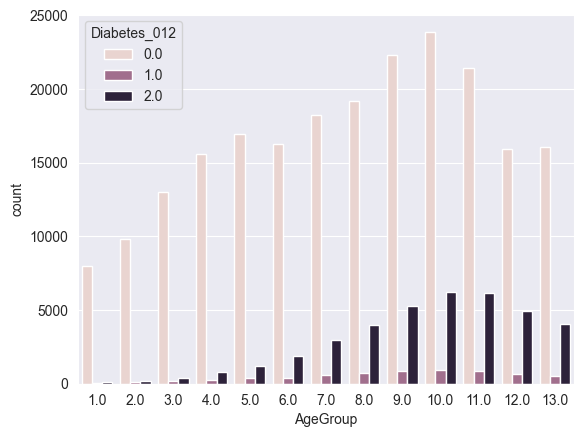

In [21]:
sns.countplot(x='AgeGroup', hue='Diabetes_012', data=df)

In [6]:
# Preprocessing
numeric_cols = ['BMI', 'MentHlth', 'PhysHlth']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

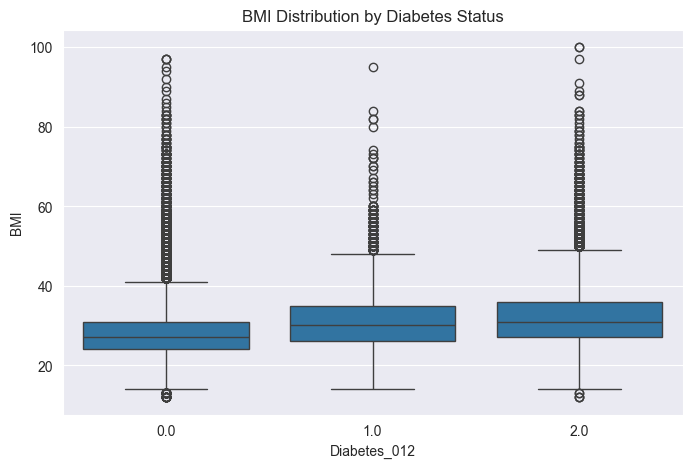

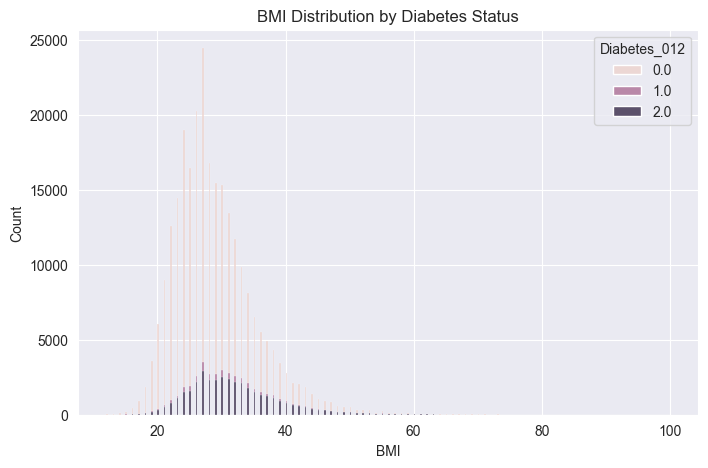

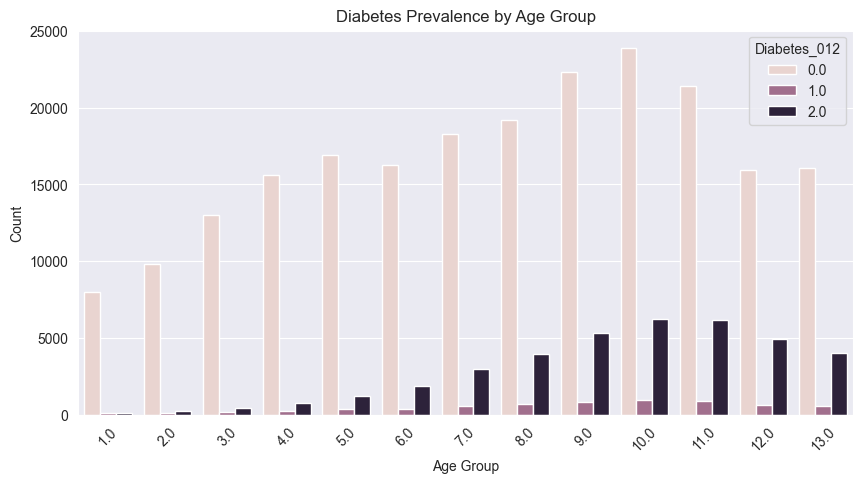

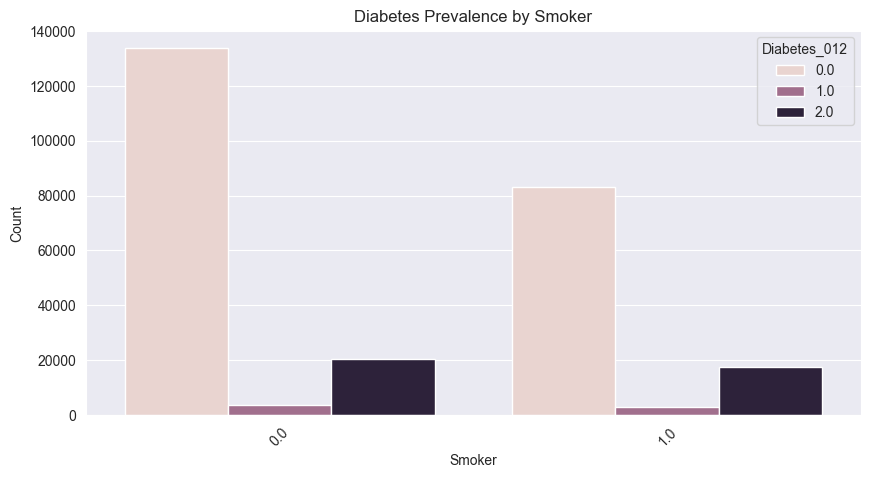

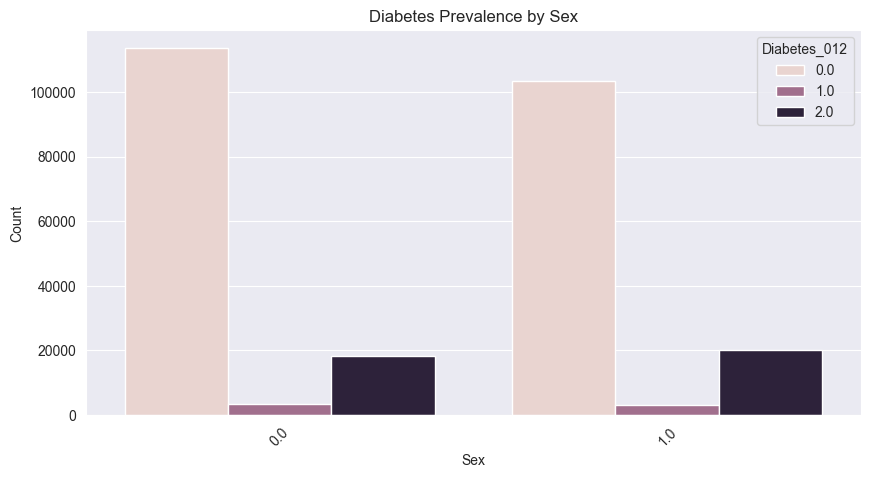

In [6]:
# Boxplot for BMI
plt.figure(figsize=(8, 5))
sns.boxplot(x='Diabetes_012', y='BMI', data=df)
plt.title("BMI Distribution by Diabetes Status")
plt.xlabel("Diabetes_012")
plt.ylabel("BMI")
plt.show()

# Histogram for BMI
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='BMI', hue='Diabetes_012', multiple="stack")
plt.title("BMI Distribution by Diabetes Status")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

# AgeGroup vs Diabetes
plt.figure(figsize=(10, 5))
sns.countplot(x='AgeGroup', hue='Diabetes_012', data=df)
plt.title("Diabetes Prevalence by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Smoker vs Diabetes
plt.figure(figsize=(10, 5))
sns.countplot(x='Smoker', hue='Diabetes_012', data=df)
plt.title("Diabetes Prevalence by Smoker")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Sex vs Diabetes
plt.figure(figsize=(10, 5))
sns.countplot(x='Sex', hue='Diabetes_012', data=df)
plt.title("Diabetes Prevalence by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

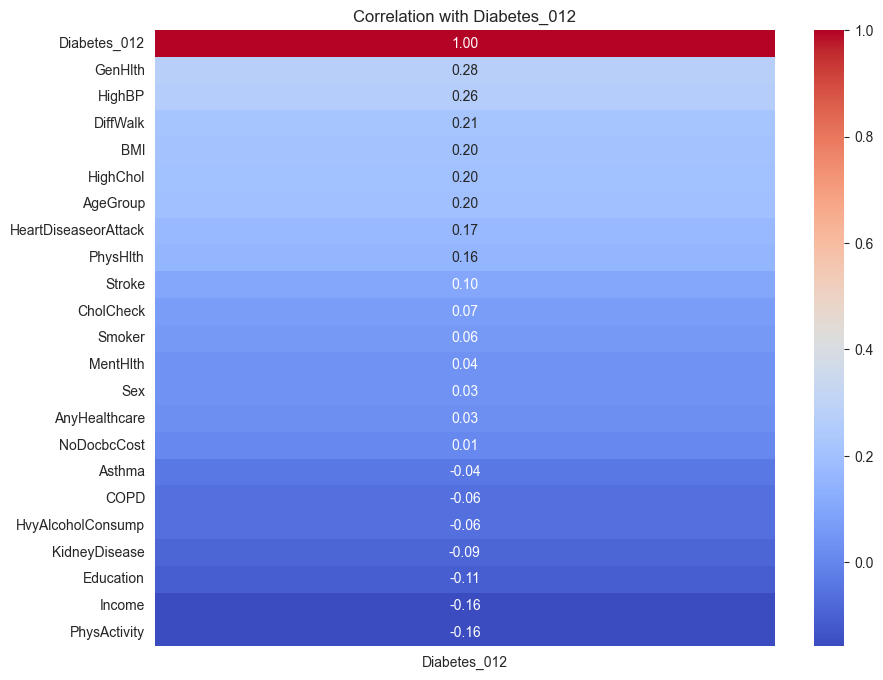

In [7]:
# Correlation with target
plt.figure(figsize=(10, 8))
corr_with_target = df.corr()['Diabetes_012'].sort_values(ascending=False)
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation with Diabetes_012")
plt.show()